In [1]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `/opt/julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/julia/environments/v1.8/Manifest.toml`


In [2]:
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/julia/environments/v1.8/Manifest.toml`


In [4]:
include("src/Sim.jl")

Main.Sim

In [5]:
using DifferentialEquations
using Plots
using .Sim

In [ ]:
using Pkg
Pkg.add(url="https://github.com/JuliaMBD/JuliaMBDv1.git")

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("DifferentialEquations")

In [ ]:
using JuliaMBDv1
using DifferentialEquations
using Plots

In [9]:
#######出来てる
#@blk ConstantブロックはIntegratorBlock()の入力ポートが一つになるように削除した
@model Eng_mnt_r_pnt begin
    
    @parameter d_Rr_ENG_mount #Gainブロック
    @parameter k_Rr_ENG_mount #Gain1ブロック
    @parameter z_k_Rr_ENG_mount_ini #Constantブロック
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 ###
    #@blk Constant = ConstantBlock(z_k_Fr_ENG_mount_ini) #()の中で定数を指定
    #@blk Integrator1 = IntegratorBlock() inport[1]:add inport[2]:cons
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Rr_ENG_mount_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Rr_ENG_mount)
    @blk Gain1 = GainBlock(k_Rr_ENG_mount)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    #@connect Constant => cons
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

Eng_mnt_r_pnt (generic function with 1 method)

In [10]:
###出来てる
@model TestEng_mnt_r_pnt begin
    @parameter d_Rr_ENG_mount k_Rr_ENG_mount z_k_Rr_ENG_mount_ini
    ##@blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:in1
    
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 15) outport:inin2
    @blk mnt_r_pnt = Eng_mnt_r_pnt(d_Rr_ENG_mount=d_Rr_ENG_mount, k_Rr_ENG_mount=k_Rr_ENG_mount, z_k_Rr_ENG_mount_ini=z_k_Rr_ENG_mount_ini) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    @connect inin1 => r
    @connect inin2 => y
    
#    @blk Step2 = StepBlock(steptime = 1, finalvalue = 120) outport:in2
    ##@blk Step2 = RampBlock(starttime = 10, slope = 5) outport:in2

    
    ##@blk mnt_f_pnt = Eng_mnt_f_pnt(d_Fr_ENG_mount=d_Fr_ENG_mount, k_Fr_ENG_mount=k_Fr_ENG_mount, z_k_Fr_ENG_mount_ini=z_k_Fr_ENG_mount_ini) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    ##@connect in1 => r
    ##@connect in2 => y

end

TestEng_mnt_r_pnt (generic function with 1 method)

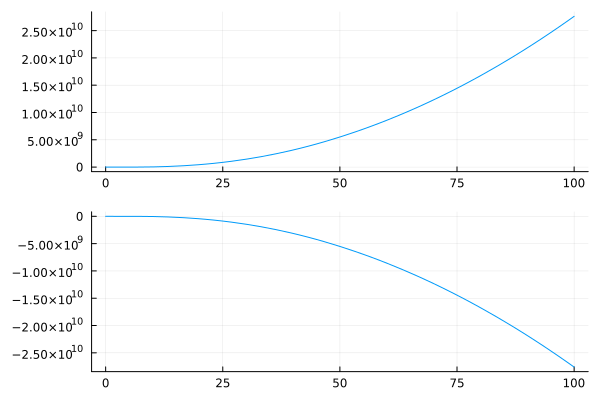

In [11]:
###出来てる
m = TestEng_mnt_r_pnt(d_Rr_ENG_mount=5215, k_Rr_ENG_mount=6.7993e+05, z_k_Rr_ENG_mount_ini=0);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph